In [1]:
%load_ext autoreload
%autoreload 2

In [127]:
import torch
import torch.nn as nn
import math
from utils import MyDataset, read_data, visualize, set_seed, save_and_plot_simu
from torch.utils.data import DataLoader
import numpy as np
from training import train, test
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEQ_LEN = 200
dim_inputs = 50
hidden_size = 100
latent_size = 100

batch_size = 64
base_lr = 0.01
lr_step = 10
num_epochs = 100

# Set random seed
set_seed(1021)

In [128]:
file = "../Simulation/data/simu6.csv"
data = read_data(file, None, SEQ_LEN, dim_inputs)
save_name_gen = '../Simulation/Result_for_Plot/simu6_gen'
save_name_status = '../Simulation/Result_for_Plot/simu6_status'

In [131]:
# Set random seed
set_seed(1021)
train_data = data
print(data.shape)
train_locs = np.array([[1, 1] for _ in range(data.shape[0])])
net = train(train_data, train_locs, batch_size, base_lr, lr_step, num_epochs, hidden_size, latent_size, SEQ_LEN)

(199, 200, 50)
Epoch [1/100], Loss1: 818.1501, Loss2: 0.9661, Loss3: 0.0042
Epoch [2/100], Loss1: 429.4894, Loss2: 1.0000, Loss3: 0.0203
Epoch [3/100], Loss1: 678.4185, Loss2: 0.9717, Loss3: 0.0202
Epoch [4/100], Loss1: 433.5659, Loss2: 0.6907, Loss3: 0.0154
Epoch [5/100], Loss1: 241.4713, Loss2: 0.9962, Loss3: 0.0351
Epoch [6/100], Loss1: 358.5891, Loss2: 0.9987, Loss3: 0.0445
Epoch [7/100], Loss1: 309.0235, Loss2: 0.9987, Loss3: 0.0790
Epoch [8/100], Loss1: 786.8315, Loss2: 0.9919, Loss3: 0.1149
Epoch [9/100], Loss1: 338.1298, Loss2: 0.9872, Loss3: 0.0949
Epoch [10/100], Loss1: 369.9960, Loss2: 0.9827, Loss3: 0.1162
Epoch [11/100], Loss1: 248.4210, Loss2: 0.4361, Loss3: 0.0219
Epoch [12/100], Loss1: 198.0500, Loss2: 0.9438, Loss3: 0.1019
Epoch [13/100], Loss1: 221.8446, Loss2: 0.9759, Loss3: 0.1227
Epoch [14/100], Loss1: 208.2198, Loss2: 0.9466, Loss3: 0.0613
Epoch [15/100], Loss1: 180.1015, Loss2: 0.9744, Loss3: 0.0564
Epoch [16/100], Loss1: 191.2367, Loss2: 0.9719, Loss3: 0.0508
Ep

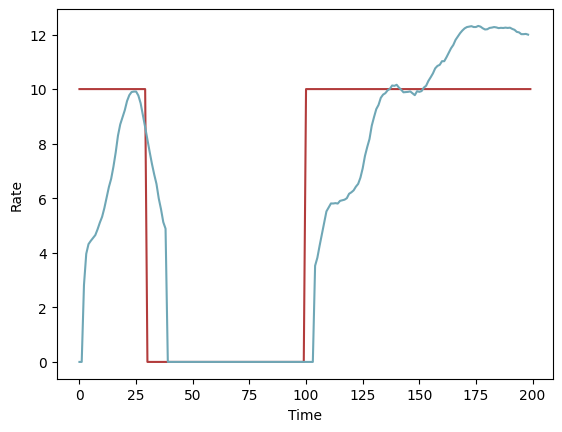

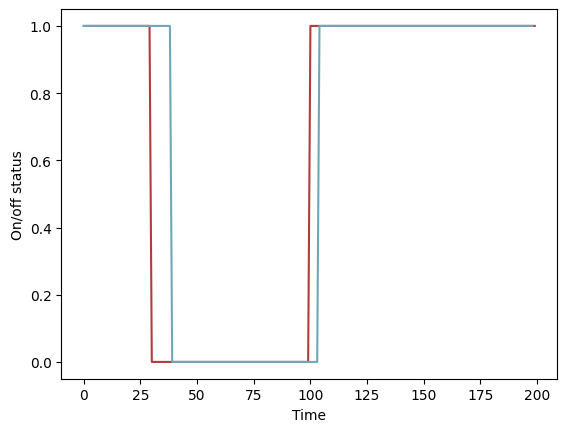

In [132]:
set_seed(1021)
test_data = data
prediction, generation, trans_status = test(test_data, train_locs, net)
# avg_gen = torch.mean(generation, dim=0).view(-1).cpu().detach().numpy()
rates = [10]*30 + [0]*70 + [10]*100 
# rates = [5]*120 + [0]*80
onoff = [1]*30 + [0]*70 + [1]*100

generation = generation.squeeze().cpu().detach().numpy()
trans_status = trans_status.squeeze().cpu().detach().numpy()
save_and_plot_simu(rates, generation[1]*trans_status[1], filename=save_name_gen)
save_and_plot_simu(onoff, trans_status[1], filename=save_name_status, switch='onoff')